## Projet Deep Learning

## Sujet 6: Classification d’images avec un réseau de neurones à convolution

#### Etudiants EBAM : Sindimwo Sophie et Amaira Zahira


Le jeu de données est extrait de CIFAR10, qui contient 60000 images de couleurs de dimensions 32x32 d'objet tel qu'avion, voitures, oiseau,..les classes d'objet sont 10 et sont classés comme suit : 

   - 0: airplane
   - 1: automobile
   - 2: bird
   - 3: cat
   - 4: deer
   - 5: dog
   - 6: frog
   - 7: horse
   - 8: ship
   - 9: truck
   
Il y a 50 000 exemples dans le jeu de données d'apprentissage et 10 000 dans le jeu de données de test 
   
Pour évaluer et comparer les différents modèles nous nous baserons sur la métrique de mesure de performance l'accuracy ratio.
Le modèle sera optimisé par descente de gradient stochastique.
Pour contrôler le sur-apprentissage et sous-apprentissage nous comparons l'accuracy ratio entre la base d'apprentissage et la base de validation.

Dans un premier temps nous testerons des modèles de réseaux de neurones standard et ensuite les réseaux de neurones à convolution qui sont plus adaptés à la classification d'image.

## 0- Import des données CIFAR 10 et premiers traitements

In [117]:
#%tensorflow_version 2.x
# !pip install tensorflow=="2.0.0"
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras.datasets import cifar10
import numpy as np

#### Recupération de la base de données cifar10, échantillons de 50000 pour la base d apprentissage


In [119]:
# Subdivion de la base en données d'apprentissage et données de test
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [120]:
# définition des classes de la  base de données
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

### Impression des 9 premières images 

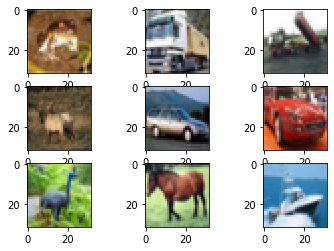

In [121]:
# impression de quelques images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(X_train[i])
# show the figure
pyplot.show()

### Commentaires : 
Les images ont une taille petite et sont assez flous donc de mauvaise qualité

In [122]:
#Passage à 10 colonnes correspondant à 10 classes
y_train = tf.keras.utils.to_categorical(y_train,NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test,NUM_CLASSES)

In [123]:
#vérification 
print(y_train.shape)

(50000, 10)


In [124]:
#vérification
print(y_test.shape)

(10000, 10)


#### Transformation de X en dimension (50000, 3072) et normalisation avant application d'un réseau de neurones  

In [125]:
# conversion d'entiers en float avant la normalisation
X_train = X_train.astype('float32')
X_test= X_test.astype('float32')
#normalisation pour avoir des valeurs entre 0 et 1, transformation de X à une dimension (50000,3072) 
X_train = X_train.reshape(X_train.shape[0], -1) / 255
X_test = X_test.reshape(X_test.shape[0], -1) / 255

In [127]:
#Vérification de la dimension
print(X_train.shape)

(50000, 3072)


In [128]:
#vérification de la dimension
print(X_test.shape)

(10000, 3072)


### I- Réseau Neurones Standard avec une seule couche

In [129]:
#import des librairies nécessaires
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

dim = X_train.shape[1]

#Construction du modèle
model = Sequential()

# Définition du nombre de noeuds en entrée du modèle ((10 Noeuds pour ce cas))
model.add(Dense(10, activation="softmax", input_dim=dim)) 

# Définition du processus d'apprentissage avec la méthode d'Optimisation "sgd" et
# la fonction de perte "catégorical_crossentropty", la métrique de mesure de la performance est la précision ("accuracy")

model.compile("sgd", "categorical_crossentropy", metrics=["accuracy"])

In [131]:
#le paramètre "batch_size" donne le nombre d’échantillons utilisés à chaque étape de la rétropropagation
#pour estimer les poids.
# Le paramètre "epochs" indique le nombre de répétitions de l’optimisation, 
#il s’agit d’amélio-rer les résultats sans en faire trop du fait du risque de sur-apprentissage.

model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 33us/sample - loss: 1.7985 - accuracy: 0.3753 - val_loss: 1.8107 - val_accuracy: 0.3647
Epoch 2/10
50000/50000 [==============================] - 2s 33us/sample - loss: 1.7871 - accuracy: 0.3799 - val_loss: 1.8077 - val_accuracy: 0.3645
Epoch 3/10
50000/50000 [==============================] - 2s 33us/sample - loss: 1.7777 - accuracy: 0.3838 - val_loss: 1.8014 - val_accuracy: 0.3629
Epoch 4/10
50000/50000 [==============================] - 2s 32us/sample - loss: 1.7694 - accuracy: 0.3870 - val_loss: 1.7921 - val_accuracy: 0.3782
Epoch 5/10
50000/50000 [==============================] - 2s 31us/sample - loss: 1.7622 - accuracy: 0.3933 - val_loss: 1.7879 - val_accuracy: 0.3743
Epoch 6/10
50000/50000 [==============================] - 2s 32us/sample - loss: 1.7562 - accuracy: 0.3934 - val_loss: 1.7728 - val_accuracy: 0.3835
Epoch 7/10
50000/50000 [==============================] 

In [132]:
#evaluation sur la base de test
scores = model.evaluate(X_test, y_test, verbose=0)
print('Loss sur la base de test:', scores[0])
print('Accuracy ratio sur la base de test:', scores[1])

Loss sur la base de test: 1.7753407028198243
Accuracy ratio sur la base de test: 0.3812


In [133]:
# evaluation sur la base d'apprentissage
scores = model.evaluate(X_train, y_train, verbose=0)
print('Loss sur la base d apprentissage:', scores[0])
print('Accuracy ratio sur la base d apprentissage:', scores[1])

Loss sur la base d apprentissage: 1.752842815551758
Accuracy ratio sur la base d apprentissage: 0.39636


### Commentaire :
L'accuracy ratio du réseau de neurone standard à une seule couche est faible de seulement 38%,  Nous allons essayer d'améliorer ce modèle par l'insertion des couches intérmedaires

### 1- 2 Réseau de Neurone standard avec deux couches intérmédiaires

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation

dim = X_train.shape[1]

#Construction du modèle
model = Sequential()

# Couches en entrée du modèle
model.add(Dense(10, activation="relu", input_dim=dim)) 

#Couche permettant de normaliser les données
model.add(BatchNormalization())

#Couche permettant d'éviter l'overfiiting
model.add(Dropout(0.1))

# Ajout d'un autre  groupe de couches
model.add(Dense(10))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
  
# Ajout d'un autre  groupe de couches
model.add(Dense(10))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))    
    
model.add(Dense(10)) 
model.add(Activation('sigmoid'))
          
# Définition du processus d'apprentissage avec la méthode d'Optimisation "sgd" et
# la fonction de perte "catégorical_crossentropty", la métrique de mesure de la performance est la précision ("accuracy")

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [135]:
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 110us/sample - loss: 2.2307 - accuracy: 0.1760 - val_loss: 2.1570 - val_accuracy: 0.2380
Epoch 2/10
50000/50000 [==============================] - 3s 54us/sample - loss: 2.1392 - accuracy: 0.2237 - val_loss: 2.0679 - val_accuracy: 0.2614
Epoch 3/10
50000/50000 [==============================] - 3s 54us/sample - loss: 2.0886 - accuracy: 0.2421 - val_loss: 2.0617 - val_accuracy: 0.2661
Epoch 4/10
50000/50000 [==============================] - 3s 54us/sample - loss: 2.0539 - accuracy: 0.2507 - val_loss: 1.9992 - val_accuracy: 0.2788
Epoch 5/10
50000/50000 [==============================] - 3s 54us/sample - loss: 2.0280 - accuracy: 0.2551 - val_loss: 1.9990 - val_accuracy: 0.2776
Epoch 6/10
50000/50000 [==============================] - 3s 56us/sample - loss: 2.0103 - accuracy: 0.2643 - val_loss: 1.9689 - val_accuracy: 0.2854
Epoch 7/10
50000/50000 [==============================]

In [136]:
#evaluation sur la base de test
scores = model.evaluate(X_test, y_test, verbose=0)
print('Loss sur la base de test:', scores[0])
print('Accuracy ratio sur la base de test:', scores[1])

Loss sur la base de test: 1.9205391416549682
Accuracy ratio sur la base de test: 0.3005


In [137]:
# evaluation sur la base d'apprentissage
scores = model.evaluate(X_train, y_train, verbose=0)
print('Loss sur la base d apprentissage:', scores[0])
print('Accuracy ratio sur la base d apprentissage:', scores[1])

Loss sur la base d apprentissage: 1.9150063327026368
Accuracy ratio sur la base d apprentissage: 0.30286


### Commentaires :
Plusieurs essais d'ajout de couche intermédiaire ont été testé mais sans permettre d'améliorer l'accuracy ratio du modèle bien au contraire ou la performance du modèle a baissé à 30% d'accuracy ratio au lieu de 38% avec une seule couche.
Vu que la qualité de l'image est mauvaise en entrée, le réseau de neurones à plusieurs couches ne peut que déteriorer la perfomance car il n'a pas la possibilité d'extraire des caractéristiques supplémentaires sur les images en entrée en superpossant les couches, en effet le réseau de neurones standard ne prend pas en compte les dépendances entre les pixels d'images contrairement au réseau de convolution qui ont cette caractéristique.

Nous testerons ces modèles et explorant les différents architectures à une, deux et trois blocs de convolution

## II- Modèle de Réseaux de Neuronnes à Convolution


Dans les réseaux de neurones, le réseau de neurones à convolution (ConvNets ou CNN) est l'un des principales catégories pour la reconnaissance d'image, les classifications d'images, la détection d'objets, la reconnaissance de visages, etc., sont quelques-uns des domaines où les CNN sont largement utilisés.

Un réseau neuronal convolutif (ConvNet / CNN) est un algorithme d'apprentissage profond qui peut prendre une image en entrée, attribuer une importance (poids et biais apprenants) à divers aspects / objets de l'image et être capable de différencier les uns des autres. Le prétraitement requis dans un CNN est beaucoup plus faible par rapport à d'autres algorithmes de classification. Alors que dans les modèles standards, les caractéristiques sont conçus à la main, avec une formation suffisante, les CNN ont la capacité d'apprendre ces caractéristiques.


Un CNN est capable de capturer avec succès les dépendances spatiales et temporelles dans une image grâce à l'application de filtres appropriés. L'architecture s'adapte mieux à l'ensemble de données d'image en raison de la réduction du nombre de paramètres impliqués et de la réutilisabilité des poids. En d'autres termes, le réseau peut être formé pour mieux comprendre la sophistication de l'image.


### Composition CNN    

    1- Couche d'entrée [INPUT], qui contient les valeurs brutes de l'image en dimension 32x32x3
    2- Bloc de convolution ou extraction des caractéristiques formés de 3 couches au moins 
        - Couche de convolution [CONV], apprentissage des filtres, alculera la sortie des neurones qui sont connectés aux régions locales en entrée, chacun calculant un produit scalaire entre leurs poids et une petite région à laquelle ils sont connectés dans le volume d'entrée. Cela peut entraîner un volume tel que [32x32x12] si nous décidons d'utiliser 12 filtres.
        - Couche d'activation  souvent non linéaire
        - Couche pooling : effectuera une opération de sous-échantillonnage le long des dimensions spatiales (largeur, hauteur), nous utiliserons dans nos exemple le max pooling
    4 - Flatten : redimension de la sortie finale en un seul vecteur pour la transmission à un réseau standard pour des fins de classification 
    3- Couche de sortie avec une fonction d'activation (softmax)    

La première couche de convolution permet d'extraire des formes simples, la deuxième couche extrait des formes plus complexe( images, vidéos,sons,...), chaque couche voit des portions de plus en plus grande de l'image

La particularité du CNN est un extracteur de features contrairement aux autres réseaux de neurones classiques.

L'architecture testée ici est l'empilement de couches convolutives avec de petits filtres 3 × 3 suivis d'une couche de regroupement maximale.
Nous testerons d'abord une couche de convolution, et puis deux couches et trois couches avec augmentant des profondeurs à 32, 64 et 128, le remplissage est utilisé pour garantir la même dimension en entrée et sortie de chaque bloc de couche

Nous testerons ces architectures avec un nombre d'EPOCH de seulement 10 et un nombre de neurones de 128, pour avoir un temps de traitement raisonnable pour mieux appréhender ces différentes architecture car le temps de traitement est plusieurs heures pour des EPOCH au déla de 20 et 100.


## II-0-  Import des données et premiers traitements

In [189]:
#Import des librairies nécessaires
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [190]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
import os

### import des données 

In [191]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [192]:
#Passage à 10 colonnes correspondant à 10 classes
y_train2 = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test2 = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

In [193]:
print(y_train2.shape)

(50000, 10)


In [194]:
print(y_test2.shape)

(10000, 10)


### Normalisation 

In [195]:
#conversion en float
x_train2 = x_train.astype('float32')
x_test2 = x_test.astype('float32')
x_train2 /= 255
x_test2 /= 255

In [196]:
print(x_test2.shape)

(10000, 32, 32, 3)


## II-1 Modélisation CNN

### Dans cette section seront testés plusieurs types d'architecture du modèle CNN
- Modèle CNN avec une couche de convolution
- Modèle CNN avec deux couches de convolution avec régularisation et normalisation
- Modèle CNN avec deux couches de convolution avec modification du nombre de filtre et nombre de neurones
- Modèle CNN avec trois couches de convolution avec régularisation et normalisation
- Modèle CNN avec trois couches de convolution avec régularisation et normalisation et augmentation

Les mêmes hypothèses de EPOCH et batch seront pris en compte pour comparer la performance du modèle (accuracy ratio) et un noyau de kernel à (3,3)
- Epoch = 10
- Batch size = 32


## II-1 Modèle CNN avec une couche de convolution

1 couche de convolution avec une taille de noyau (3, 3) avec un nombre de filtres à 32 avec une taille de remplissage identique pour que les images d'entrée et de sortie aient les mêmes dimensions.
Sans normalisation et régularisation et nombre de neurones en sortie de 128

In [147]:
#Contstruction modèle
model = Sequential()
#convolution avec une profondeur de 32
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#reduction de dimension
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
#couche de sortie avec 128 noeuds
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#couche avec 10 noeuds
model.add(Dense(10, activation='softmax'))

In [148]:
# compile model
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [149]:
history=model.fit(x_train2, y_train2, batch_size=32, epochs=10,validation_data=(x_test2 , y_test2),verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 108s 2ms/sample - loss: 1.5506 - accuracy: 0.4489 - val_loss: 1.3168 - val_accuracy: 0.5342
Epoch 2/10
50000/50000 [==============================] - 107s 2ms/sample - loss: 1.2037 - accuracy: 0.5797 - val_loss: 1.1703 - val_accuracy: 0.5832
Epoch 3/10
50000/50000 [==============================] - 104s 2ms/sample - loss: 1.0634 - accuracy: 0.6323 - val_loss: 1.1339 - val_accuracy: 0.6009
Epoch 4/10
50000/50000 [==============================] - 105s 2ms/sample - loss: 0.9703 - accuracy: 0.6661 - val_loss: 1.0796 - val_accuracy: 0.6168
Epoch 5/10
50000/50000 [==============================] - 106s 2ms/sample - loss: 0.8954 - accuracy: 0.6913 - val_loss: 1.0213 - val_accuracy: 0.6478
Epoch 6/10
50000/50000 [==============================] - 108s 2ms/sample - loss: 0.8340 - accuracy: 0.7135 - val_loss: 0.9990 - val_accuracy: 0.6511
Epoch 7/10
50000/50000 [==========================

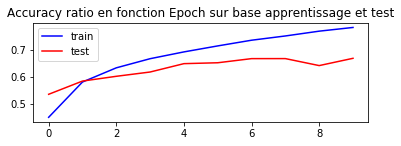

In [170]:
## Plot d'accuracy ratio et Loss en fonction Epoch
pyplot.subplot(211)
pyplot.title('Accuracy ratio en fonction Epoch sur base apprentissage et test')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='red', label='test')
pyplot.legend()

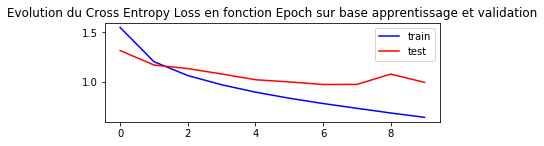

In [171]:
## Graphe pour l'evolution de loss en fonction Epoch
pyplot.subplot(212)
pyplot.title('Evolution du Cross Entropy Loss en fonction Epoch sur base apprentissage et validation')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='red', label='test')
pyplot.legend()

In [172]:
#evaluation sur la base de test
scores = model.evaluate(x_test2, y_test2, verbose=0)
print('Loss sur la base de test:', scores[0])
print('Accuracy ratio sur la base de test:', scores[1])

Loss sur la base de test: 0.9947429609298706
Accuracy ratio sur la base de test: 0.6676


In [173]:
# evaluation sur la base d'apprentissage
scores = model.evaluate(x_train2, y_train2, verbose=0)
print('Loss sur la base d apprentissage:', scores[0])
print('Accuracy ratio sur la base d apprentissage:', scores[1])

Loss sur la base d apprentissage: 0.612519174861908
Accuracy ratio sur la base d apprentissage: 0.79264


### Prédiction avec ce modèle sur quelques images

In [ ]:
#Prédiction des probabilités de chaque image sur de la base de validation
y_pred_test = model.predict_proba(x_test2)
#obtention de la classe de l'image en utilisant la fonction argmax
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
#obtention de la probabilité de la classe en utilisant le maximum
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

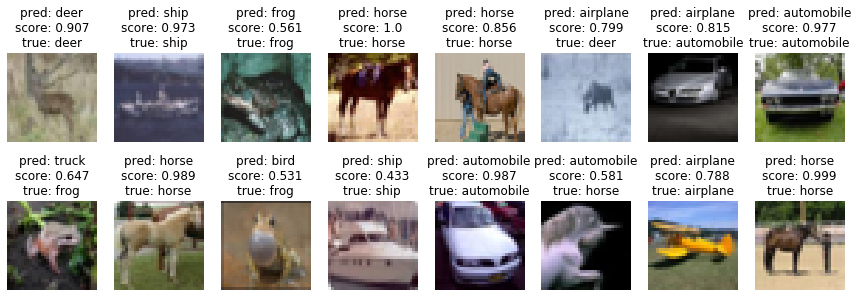

In [168]:
cols = 8
rows = 2
fig =pyplot.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label =  cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
pyplot.show()

### Commentaires:
Le taux d'accuracy ratio est de 81 sur la base d'apprentissage et seulement de 68% sur la base de test, il y a overfitting du pour les prochains test d'architecture ajout de la régularisation pour contrôler overfitting et normalisation pour accèlerer l'apprentissage

## II- 2- CNN à deux couches de convolutions(16 et 32) avec régularisation et normalisation
Nous empilerons deux couches de convolution avec une taille de noyau (3, 3) avec un nombre de filtres à (16, 32) avec une taille de remplissage identique pour que les images d'entrée et de sortie aient les mêmes dimensions.
Nous introduirons la normalisation et la régularisation et le nombre de neurones en sortie est de 128

In [220]:
# Construction du modèle avec 2 blocs avce régularisation et normalisation à la sortie de chaque bloc
model = Sequential()
#1 ere convolution à 32 
model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
#Normalisation pour accelerer la convergence
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#Normalisation
model.add(BatchNormalization())
#Pooling, maximum sur chaque noyau de 2x2
model.add(MaxPooling2D((2, 2)))
#Régularisation à 25%, exclusion aléatoire de 25% de l'échantillon
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid'))
#Normalisation
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
#Régularisation à 25%, exclusion aléatoire de 25% de l'échantillon
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#Couche de sortie à 10 noeuds correspondant au nombre de classes
model.add(Dense(10, activation='softmax'))

In [221]:
# compilation du  modèle
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [222]:
history=model.fit(x_train2, y_train2, batch_size=32, epochs=10,validation_data=(x_test2 , y_test2),verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 66s 1ms/sample - loss: 1.8499 - accuracy: 0.3475 - val_loss: 1.4467 - val_accuracy: 0.4801
Epoch 2/10
50000/50000 [==============================] - 61s 1ms/sample - loss: 1.4591 - accuracy: 0.4761 - val_loss: 1.2966 - val_accuracy: 0.5326
Epoch 3/10
50000/50000 [==============================] - 61s 1ms/sample - loss: 1.3211 - accuracy: 0.5296 - val_loss: 1.2161 - val_accuracy: 0.5629
Epoch 4/10
50000/50000 [==============================] - 61s 1ms/sample - loss: 1.2180 - accuracy: 0.5663 - val_loss: 1.1408 - val_accuracy: 0.5920
Epoch 5/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.1467 - accuracy: 0.5951 - val_loss: 1.0846 - val_accuracy: 0.6102
Epoch 6/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.0768 - accuracy: 0.6179 - val_loss: 1.0397 - val_accuracy: 0.6291
Epoch 7/10
50000/50000 [==============================] 

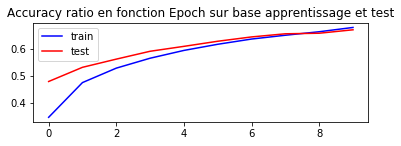

In [223]:
pyplot.subplot(211)
pyplot.title('Accuracy ratio en fonction Epoch sur base apprentissage et test')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='red', label='test')
pyplot.legend()

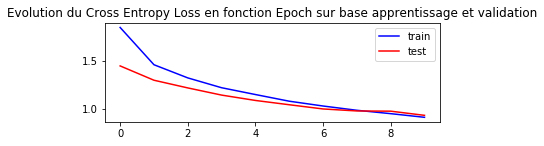

In [224]:
## Graphe pour l'evolution de loss en fonction Epoch
pyplot.subplot(212)
pyplot.title('Evolution du Cross Entropy Loss en fonction Epoch sur base apprentissage et validation')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='red', label='test')
pyplot.legend()

In [225]:
#evaluation sur la base d'apprentissage
scores = model.evaluate(x_train2, y_train2, verbose=0)
print('Loss sur la base d apprentissage:', scores[0])
print('Accuracy ratio sur la base d apprentissage:', scores[1])

Loss sur la base d apprentissage: 0.7745247239303589
Accuracy ratio sur la base d apprentissage: 0.7294


In [226]:
#evaluation sur la base de test
scores = model.evaluate(x_test2, y_test2, verbose=0)
print('Loss sur la base de test:', scores[0])
print('Accuracy ratio sur la base de test:', scores[1])

Loss sur la base de test: 0.9286192717552185
Accuracy ratio sur la base de test: 0.6715


## II- 2- CNN à deux couches de convolutions(16 et 32) avec régularisation et normalisation et reduction du nombre de neurones (90 au lieu 128)

Nous empilerons 2 couches de convolution avec une taille de noyau (3, 3) avec un nombre croissant de filtres (16,32) avec une taille de remplissage identique pour que les images d'entrée et de sortie aient les mêmes dimensions.
Pour la régularisation, nous utiliserons DROPOUT avec un taux d'exclusion fixe à 25% et une normalisation à chaque sortie de bloc de convolution
Le nombre de neurones en sortie est de 90

In [234]:
# Construction du modèle avec 2 blocs avce régularisation et normalisation à la sortie de chaque bloc
model = Sequential()
#1 ere convolution à 32 
model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
#Normalisation pour accelerer la convergence
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#Normalisation
model.add(BatchNormalization())
#Pooling, maximum sur chaque noyau de 2x2
model.add(MaxPooling2D((2, 2)))
#Régularisation à 25%, exclusion aléatoire de 25% de l'échantillon
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid'))
#Normalisation
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
#Régularisation à 25%, exclusion aléatoire de 25% de l'échantillon
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(90, activation='relu', kernel_initializer='he_uniform'))
#Couche de sortie à 10 noeuds correspondant au nombre de classes
model.add(Dense(10, activation='softmax'))

In [228]:
# compilation du  modèle
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [229]:
history=model.fit(x_train2, y_train2, batch_size=32, epochs=10,validation_data=(x_test2 , y_test2),verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 67s 1ms/sample - loss: 1.8756 - accuracy: 0.3315 - val_loss: 1.5268 - val_accuracy: 0.4442
Epoch 2/10
50000/50000 [==============================] - 61s 1ms/sample - loss: 1.5165 - accuracy: 0.4527 - val_loss: 1.4041 - val_accuracy: 0.4974
Epoch 3/10
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.3878 - accuracy: 0.5018 - val_loss: 1.3503 - val_accuracy: 0.5230
Epoch 4/10
50000/50000 [==============================] - 61s 1ms/sample - loss: 1.2932 - accuracy: 0.5379 - val_loss: 1.2814 - val_accuracy: 0.5453
Epoch 5/10
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.2232 - accuracy: 0.5634 - val_loss: 1.1918 - val_accuracy: 0.5820
Epoch 6/10
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.1684 - accuracy: 0.5837 - val_loss: 1.1957 - val_accuracy: 0.5820
Epoch 7/10
50000/50000 [==============================] 

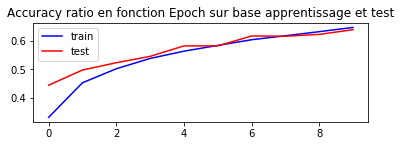

In [230]:
pyplot.subplot(211)
pyplot.title('Accuracy ratio en fonction Epoch sur base apprentissage et test')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='red', label='test')
pyplot.legend()

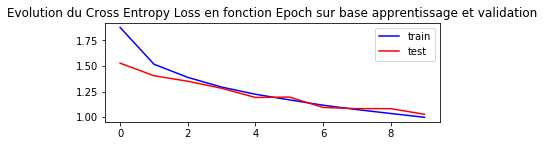

In [231]:
## Graphe pour l'evolution de loss en fonction Epoch
pyplot.subplot(212)
pyplot.title('Evolution du Cross Entropy Loss en fonction Epoch sur base apprentissage et validation')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='red', label='test')
pyplot.legend()

In [232]:
#evaluation sur la base d'apprentissage
scores = model.evaluate(x_train2, y_train2, verbose=0)
print('Loss sur la base d apprentissage:', scores[0])
print('Accuracy ratio sur la base d apprentissage:', scores[1])

Loss sur la base d apprentissage: 0.897275348148346
Accuracy ratio sur la base d apprentissage: 0.68392


In [233]:
#evaluation sur la base de test
scores = model.evaluate(x_test2, y_test2, verbose=0)
print('Loss sur la base de test:', scores[0])
print('Accuracy ratio sur la base de test:', scores[1])

Loss sur la base de test: 1.02740892162323
Accuracy ratio sur la base de test: 0.6389


### Commentaires: 
Avec la baise du nombre de neurone en couche de sortie de 128 à 90, la performance du modèle a baissé de 67 à 63%
Donc pour un même nombre de filtres de convolution et le nombre de neurone a un impact sur la performance du modèle



## II- 2- CNN à deux couches de convolutions(32 et 64) avec régularisation et normalisation 

Nous empilerons 2 couches de convolution avec une taille de noyau (3, 3) avec un nombre croissant de filtres (32, 64) avec une taille de remplissage identique pour que les images d'entrée et de sortie aient les mêmes dimensions.
Pour la régularisation, nous utiliserons DROPOUT avec un taux d'exclusion fixe à 25% et normalisation en chaque sortie de bloc de convolution
Ici nous garderons le même nombre de neurones de 128, et augmentant le nombre de filtres pour les blocs de convolution à 32 et 64


In [95]:
# Construction du modèle avec 2 blocs avce régularisation et normalisation à la sortie de chaque bloc
model = Sequential()
#1 ere convolution à 32 
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
#Normalisation pour accelerer la convergence
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#Normalisation
model.add(BatchNormalization())
#Pooling, maximum sur chaque noyau de 2x2
model.add(MaxPooling2D((2, 2)))
#Régularisation à 25%, exclusion aléatoire de 25% de l'échantillon
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#Normalisation
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
#Régularisation à 25%, exclusion aléatoire de 25% de l'échantillon
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#Couche de sortie à 10 noeuds correspondant au nombre de classes
model.add(Dense(10, activation='softmax'))

In [96]:
# compilation du  modèle
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [97]:
history=model.fit(x_train2, y_train2, batch_size=32, epochs=10,validation_data=(x_test2 , y_test2),verbose=0)

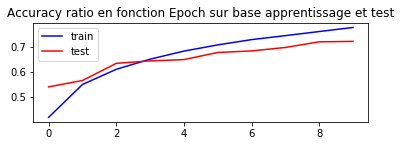

In [98]:
pyplot.subplot(211)
pyplot.title('Accuracy ratio en fonction Epoch sur base apprentissage et test')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='red', label='test')
pyplot.legend()

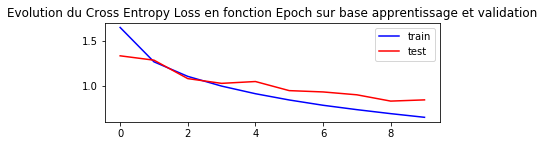

In [99]:
## Graphe pour l'evolution de loss en fonction Epoch
pyplot.subplot(212)
pyplot.title('Evolution du Cross Entropy Loss en fonction Epoch sur base apprentissage et validation')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='red', label='test')
pyplot.legend()

In [100]:
#evaluation sur la base d'apprentissage
scores = model.evaluate(x_train2, y_train2, verbose=0)
print('Loss sur la base d apprentissage:', scores[0])
print('Accuracy ratio sur la base d apprentissage:', scores[1])

Loss sur la base d apprentissage: 0.5232198971176147
Accuracy ratio sur la base d apprentissage: 0.81666


In [101]:
#evaluation sur la base de test
scores = model.evaluate(x_test2, y_test2, verbose=0)
print('Loss sur la base de test:', scores[0])
print('Accuracy ratio sur la base de test:', scores[1])

Loss sur la base de test: 0.839793127822876
Accuracy ratio sur la base de test: 0.7211


### Commentaires:
- Avec un nombre de neuones équivalent et augmentation du nombre de filtres dans les couches (32,64) au lieu (16,32) la performance du modèle s'améliore de 67 à 72%.
- Pour une architecture à deux blocs de convolution il suffit d'augmenter le nombre de filtre par convolution et augmenter le nombre de noeuds avec une maitrise de temps de traitement pour améliorer la performance
- La normalisation est nécessaire à la sortie de chaque couche de convolution car cela permet d'accelerer la convergence du modèle.
- La régularisation est également nécessaire pour mieux contrôler l'overfitting du modèle
- Plus on ajoute de convolution dans le modèle plus on améliore sa perfomance, nous avons testé des modèles avec un seul et deux blocs de convolution, nous testerons également une architecture à 3 blocs de convolution pour évaluer l'augmentation de la performance du modèle, nous garderons le même nombre de neurones dans les couches de sortie ainsi que le nombre d'EPOCH pour pouvoir comparer les modèles testés et un temps de traitement pas trop long.  

## II- 3- CNN avec trois couches de convolution (32, 64 et 128) avec régularisation et normalisation 

Nous empilerons 3 couches de convolution avec une taille de noyau (3, 3) avec un nombre croissant de filtres (32, 64, 128) avec une taille de remplissage identique pour que les images d'entrée et de sortie aient les mêmes dimensions.
Pour la régularisation, nous utiliserons DROPOUT avec augmentation des % progressivement (25, 35 et 45%) et normalisation en chaque sortie de bloc de convolution
Le nombre de neurones en sortie est de 128

In [197]:
# Construction du modèle avec 3 blocs de convolution avce régularisation et normalisation à la sortie de chaque bloc
model = Sequential()
#1er convolution à 32
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#Normalisation
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
#Régularisation, 20%
model.add(Dropout(0.25))
#2ème convolution à 64
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#Normalisation
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
#Régularisation, exclusion aléatoirement de 30% de l'échantillon
model.add(Dropout(0.35))
#3eme convolution à 128
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#Normalisation
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
#Régularisation, exclusion aléatoirement de 45% de l'échantillon
model.add(Dropout(0.45))
#phase aplatissage avant dernière couche
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [198]:
# compilation du  modèle
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [199]:
history=model.fit(x_train2, y_train2, batch_size=32, epochs=10,validation_data=(x_test2 , y_test2))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 248s 5ms/sample - loss: 1.8974 - accuracy: 0.3255 - val_loss: 1.6631 - val_accuracy: 0.4201
Epoch 2/10
50000/50000 [==============================] - 243s 5ms/sample - loss: 1.4852 - accuracy: 0.4605 - val_loss: 1.6168 - val_accuracy: 0.4749
Epoch 3/10
50000/50000 [==============================] - 243s 5ms/sample - loss: 1.3437 - accuracy: 0.5173 - val_loss: 1.4751 - val_accuracy: 0.5056
Epoch 4/10
50000/50000 [==============================] - 244s 5ms/sample - loss: 1.2218 - accuracy: 0.5643 - val_loss: 1.3050 - val_accuracy: 0.5604
Epoch 5/10
50000/50000 [==============================] - 247s 5ms/sample - loss: 1.1318 - accuracy: 0.5967 - val_loss: 1.2887 - val_accuracy: 0.5684
Epoch 6/10
50000/50000 [==============================] - 248s 5ms/sample - loss: 1.0588 - accuracy: 0.6224 - val_loss: 1.0257 - val_accuracy: 0.6477
Epoch 7/10
50000/50000 [==========================

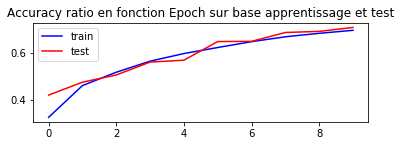

In [200]:
## Plot d'accuracy ratio et Loss en fonction Epoch
pyplot.subplot(211)
pyplot.title('Accuracy ratio en fonction Epoch sur base apprentissage et test')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='red', label='test')
pyplot.legend()

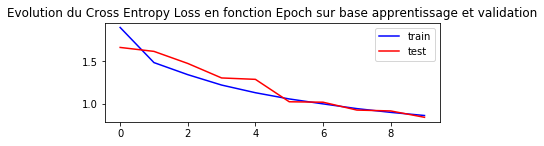

In [201]:
## Graphe pour l'evolution de loss en fonction Epoch
pyplot.subplot(211)
pyplot.title('Evolution du Cross Entropy Loss en fonction Epoch sur base apprentissage et validation')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='red', label='test')
pyplot.legend()

In [202]:
#evaluation sur la base d'apprentissage
scores = model.evaluate(x_train2, y_train2, verbose=0)
print('Loss sur la base d apprentissage:', scores[0])
print('Accuracy ratio sur la base d apprentissage:', scores[1])

Loss sur la base d apprentissage: 0.7441370401573181
Accuracy ratio sur la base d apprentissage: 0.7352


In [206]:
#evaluation sur la base de test
scores = model.evaluate(x_test2, y_test2, verbose=0)
print('Loss sur la base de test:', scores[0])
print('Accuracy ratio sur la base de test:', scores[1])

Loss sur la base de test: 0.8433696510314942
Accuracy ratio sur la base de test: 0.7077


#### Prédiction avec ce modèle sur la base de test et affiche de quelques images avec leur prediction

In [204]:
#Prédiction des probabilités de chaque image sur de la base de validation
y_pred_test = model.predict_proba(x_test2)
#obtention de la classe de l'image en utilisant la fonction argmax
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
#obtention de la probabilité de la classe en utilisant le maximum
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

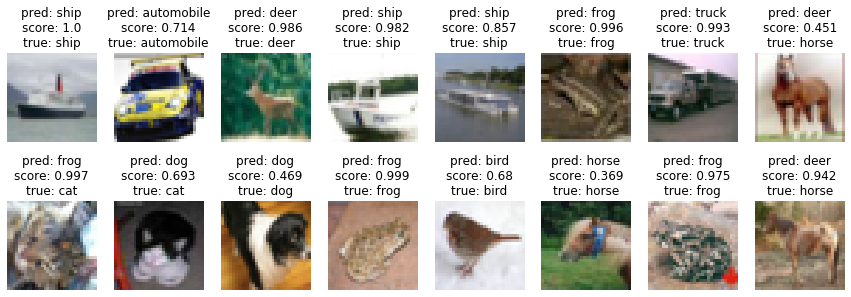

In [205]:
cols = 8
rows = 2
fig =pyplot.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label =  cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
pyplot.show()

### Commentaire:
- La performance du modèle s'améliore avec une architecture à 3 blocs de convolution à 71%
- La modification du poids d'exclusion de l'échantillon (Dropout) progressivement de 25%, 35 et 45% améliore le contrôle de l overfitting.
- La perfomance peut être améliorée avec la technique de DataAugmentation, technique qui consiste à augmenter la taille de l'échantillon en apportant des modifications aléatoires sur l'échantillon d'apprentissage.

## II- 3- Modèle avec trois couches de convolution (32, 64 et 128) avec régularisation, normalisation et Data augmentation
Nous empilerons 3 couches de convolution avec une taille de noyau (3, 3) avec un nombre croissant de filtres (32, 64, 128) avec une taille de remplissage identique pour que les images d'entrée et de sortie aient les mêmes dimensions.
Pour la régularisation, nous utiliserons DROPOUT avec augmentation des % progressivement (25, 35 et 45%) et normalisation en chaque sortie de bloc de convolution
Nous utiliserons les techniques de DataAugmentation pour améliorer la performance du modèle
Le nombre de neurones en sortie est de 128

#### Data Augmentation :
L'augmentation des données consiste à faire des copies des exemples dans l'ensemble de données d’apprentissage avec de petites modifications aléatoires.
L’augmentation des données d'image est une technique qui peut être utilisée pour augmenter artificiellement la taille d'un ensemble de données d'apprentissage en créant des versions modifiées des images dans l'ensemble de données.
Etant la petite taille des photos (32x32), le type de modification aléatoire qui sont appliqué seulement retournements horizontaux et des décalages de 10% de la hauteur et de la largeur de l’image

In [208]:
#import de la librairie pour Dataaugmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [209]:
# création data generator :retournement horizontal décalage de 10% de la hauteur et de la largeur de l'image
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(x_train2, y_train2, batch_size=32)

#Nombre itération 
steps = int(x_train2.shape[0] / 32)
#fit du modele
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=10, validation_data=(x_test2, y_test2), verbose=1)


Epoch 1/10
1562/1562 [==============================] - 1629s 1s/step - loss: 0.9921 - accuracy: 0.6522 - val_loss: 1.0312 - val_accuracy: 0.6648
Epoch 2/10
1562/1562 [==============================] - 1742s 1s/step - loss: 0.9549 - accuracy: 0.6655 - val_loss: 0.9923 - val_accuracy: 0.6722
Epoch 3/10
1562/1562 [==============================] - 1328s 850ms/step - loss: 0.9249 - accuracy: 0.6757 - val_loss: 1.1020 - val_accuracy: 0.6615
Epoch 4/10
1562/1562 [==============================] - 2113s 1s/step - loss: 0.9084 - accuracy: 0.6803 - val_loss: 0.9819 - val_accuracy: 0.6809
Epoch 5/10
1562/1562 [==============================] - 1418s 908ms/step - loss: 0.8865 - accuracy: 0.6905 - val_loss: 0.7995 - val_accuracy: 0.7313
Epoch 6/10
1562/1562 [==============================] - 1580s 1s/step - loss: 0.8693 - accuracy: 0.6944 - val_loss: 0.8444 - val_accuracy: 0.7156
Epoch 7/10
1562/1562 [==============================] - 1241s 795ms/step - loss: 0.8457 - accuracy: 0.7025 - val_loss:

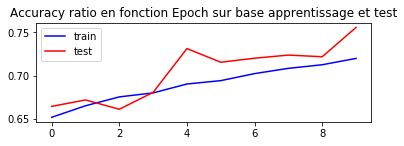

In [210]:
## Graphe d'accuracy ratio et Loss en fonction Epoch
pyplot.subplot(211)
pyplot.title('Accuracy ratio en fonction Epoch sur base apprentissage et test')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='red', label='test')
pyplot.legend()

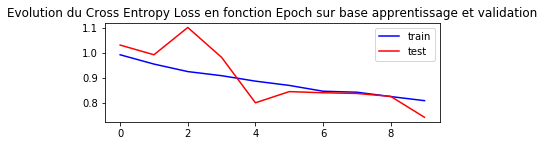

In [211]:
## Graphe pour l'evolution de loss en fonction Epoch
pyplot.subplot(211)
pyplot.title('Evolution du Cross Entropy Loss en fonction Epoch sur base apprentissage et validation')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='red', label='test')
pyplot.legend()

In [212]:
#Evaluation du modèle sur la base d'apprentissage
scores = model.evaluate(x_train2, y_train2, verbose=0)
print('Loss sur la base d apprentissage:', scores[0])
print('Accuracy ratio sur la base d apprentissage:', scores[1])

Loss sur la base d apprentissage: 0.6624259647655487
Accuracy ratio sur la base d apprentissage: 0.7742


In [213]:
#Evaluation du modèle sur la base de test
scores = model.evaluate(x_test2, y_test2, verbose=0)
print('Loss sur la base de test:', scores[0])
print('Accuracy ratio sur la base de test:', scores[1])

Loss sur la base de test: 0.7411921356201172
Accuracy ratio sur la base de test: 0.7556


### Prediction sur quelques images issues de la base de validation

In [215]:
#Prédiction des probabilités de chaque image sur de la base de validation
y_pred_test = model.predict_proba(x_test2)
#obtention de la classe de l'image en utilisant la fonction argmax
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
#obtention de la probabilité de la classe en utilisant le maximum
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

### Commentaires 
Affichage d'un ensemble de 16 images choisit aléatoirement et représentées sur deux lignes et 8 colonnes avec le nom de la classe prédite et la vraie classe ainsi que la probabilité correspondante

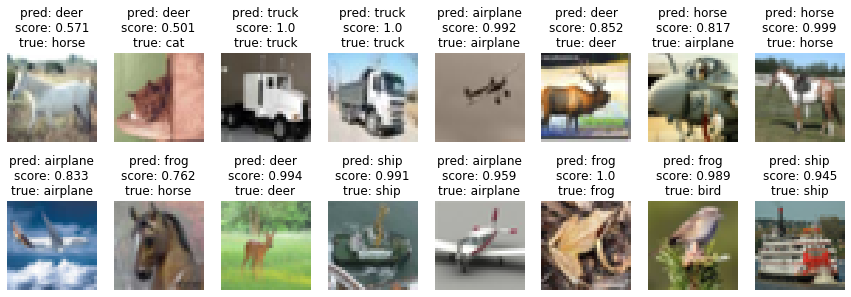

In [216]:
cols = 8
rows = 2
fig =pyplot.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label =  cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
pyplot.show()

## Conclusion :
Performance des modèles testés avec un batch size de 32 et Epoch seulement de 10:
#### Résaux de neurones standard :
- 1 couche avec 10 noeuds : 38%
- 3 couches intermédiaires : 30%
#### CNN :
- 1 couche de convolution avec des filtres à 32 sans régularisation et 128 noeuds de sortie: 66% avec présence overfitting
- 2 couches de convolutions avec des filtres à 16 et 32 et 90 neurones avec régulatrisation et normalisation avec 90 neurones de sortie : 64%
- 2 couches de convolutions avec des filtres à 16 et 32 et 128 neurones avec régulatrisation et normalisation et 128 neurones en sortie : 67%
- 2 couches de convolutions avec des filtres à 32 et 64 avec régulatrisation (fixe) et normalisation et 128 neurones en sortie: 72% mais avec une présence d'overfitting
- 3 couches de convolutions avec des filtres 32, 64 et 128 avec régularisation (progressive) et normalisation : 71% sans overfitting car augmentation du taux d'exlusion d'échantillon aléatoire par augmentation, 25, 35 et 45%
- 3 couches de convolutions avec des filtres 32, 64 et 128 avec régularisation et normalisation et DataAugmentation: 76%.

La meilleure performance du modèle est obtenue avec une Accuracy de 76% et une architecture à 3 blocs de convolutions, avec une normalisation, une régularisation progessive(25,35 et 45% d'exclusion) et une data Augmentation cela a été testé sur seulement 10 Epoch car le temps de traitement au dèla de 20 Epoch est très long, la performance peut être supérieure avec un EPOCH supérieur à 100 voire 200 (temps de traitement supérieur à 6h)

Malgré une mauvaise qualité des images en entrée (images flous et de petite taille), les réseaux de neurones à convolution arrivent à donner des résultats convenables, contrairement aux réseaux de neurones standard ou la performance est très faible malgré plusieurs couches intermédiaires, car le CNN prend en compte des différents dépendances des pixels d'une image et utilisent les mêmes poids contraitement aux réseau de neurones standard qui ne considère pas cette dépendence 


Les réseaux de convolutions sont des extracteurs de caractéristiques des images. De ce fait avec les réseaux de neurones à convolution le pré traitement des données n’est pas nécessaire grâce aux couches de convolutions qui arrivent à traiter toutes les informations d’une image même sur les côtés, ainsi plus l'information est complexe plus de couches de convolution sont nécessaires pour traiter l'information.

Un CNN est capable de capturer avec succès les dépendances spatiales et temporelles dans une image grâce à l'application de filtres appropriés. L'architecture s'adapte mieux à l'ensemble de données d'image en raison de la réduction du nombre de paramètres impliqués et de la réutilisabilité des poids. En d'autres termes, le réseau peut être formé pour mieux comprendre la sophistication de l'image.

Enfin pour avoir une meilleure perfomance de modèle il nécessaire d'augmenter le nombre des blocs de convolutions avec un contrôle de l'overffiting et normalisation à chaque bloc de convolution, et plus l'image en entrée est complexe plus le nombre de blocs de convolution est nécessaire avec un niveau d'EPOCH supérieur à 100 qui permettra de mieux entrainer le modèle.

Le temps de traitement d'un CNN est très longs comparé à un réseau standard, le traitement avec GPU est nécessaire pour pouvoir tester des architectures avec plusieurs blocs convolution et nombre EPOCH élevé (supérieur à 100)